<a href="https://colab.research.google.com/github/RollinPumpkin/PCVK_2024-2025/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

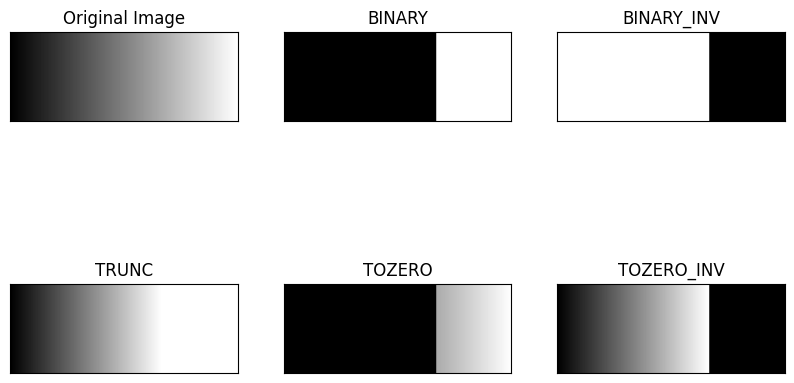

In [16]:
# Create a sample grayscale gradient image
gradient = np.linspace(0, 255, 256).astype(np.uint8)
gradient = np.tile(gradient, (100, 1))

# Apply different global thresholding techniques with threshold = 170
threshold_value = 170
_, binary = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_TOZERO_INV)

# Display the images using matplotlib
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

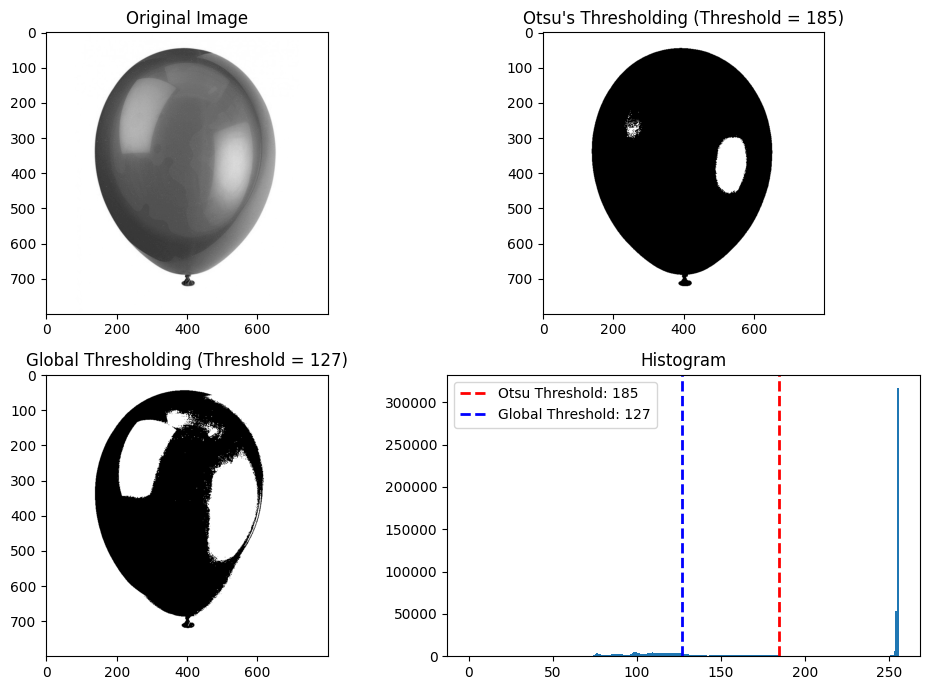

In [19]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image, specifying the full path including the Google Drive mount point
image = Image.open('/content/drive/MyDrive/balloon.jpg').convert('L')  # Convert image to grayscale and include the full path to your image
image_np = np.array(image)

# Function to compute histogram of an image
def compute_histogram(image):
    hist = np.zeros(256)
    for pixel_value in image.ravel():
        hist[pixel_value] += 1
    return hist

# Function to perform Otsu's thresholding
def otsu_threshold(image):
    # Calculate image histogram
    hist = compute_histogram(image)
    total_pixels = image.size
    current_max, threshold = 0, 0
    sum_total, sum_foreground, weight_background, weight_foreground = 0, 0, 0, 0

    for i in range(256):
        sum_total += i * hist[i]

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_foreground += i * hist[i]
        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        # Between class variance
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Check if new maximum found
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    return threshold

# Function to apply global threshold
def apply_global_threshold(image, threshold_value):
    binary_image = image > threshold_value
    return binary_image

# Compute Otsu's threshold
otsu_thresh = otsu_threshold(image_np)

# Apply Otsu's threshold to image
otsu_binary_image = apply_global_threshold(image_np, otsu_thresh)

# Apply a basic global threshold for comparison
global_thresh = 127  # You can use any value here
global_binary_image = apply_global_threshold(image_np, global_thresh)

# Plot results
plt.figure(figsize=(10, 7))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')

# Otsu's Thresholding
plt.subplot(2, 2, 2)
plt.imshow(otsu_binary_image, cmap='gray')
plt.title(f"Otsu's Thresholding (Threshold = {otsu_thresh})")

# Global Thresholding
plt.subplot(2, 2, 3)
plt.imshow(global_binary_image, cmap='gray')
plt.title(f"Global Thresholding (Threshold = {global_thresh})")

# Histogram
plt.subplot(2, 2, 4)
plt.hist(image_np.ravel(), bins=256, range=(0, 256))
plt.axvline(otsu_thresh, color='r', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {otsu_thresh}')
plt.axvline(global_thresh, color='b', linestyle='dashed', linewidth=2, label=f'Global Threshold: {global_thresh}')
plt.legend()
plt.title('Histogram')

plt.tight_layout()
plt.show()


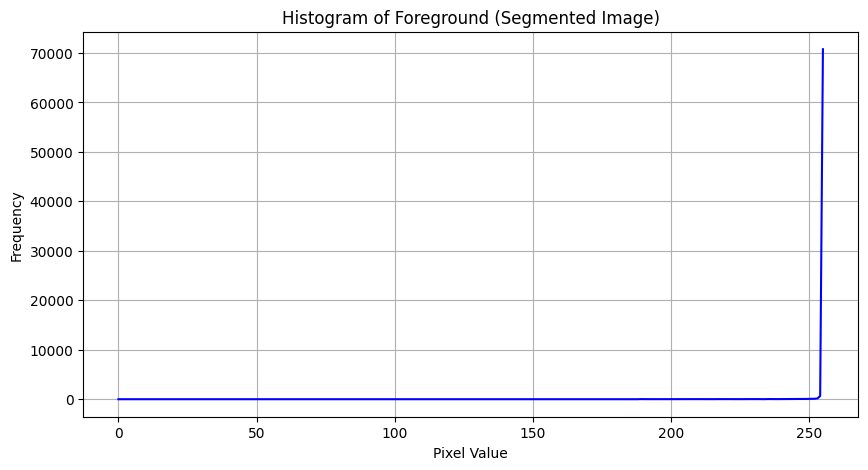

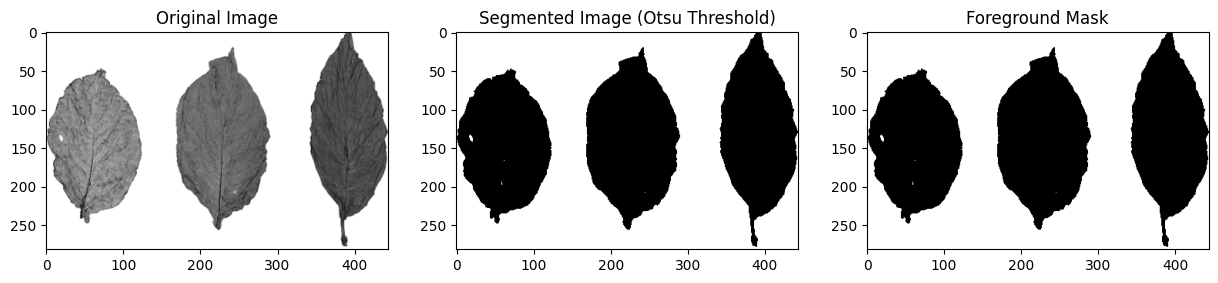

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image_path = '/content/drive/MyDrive/tobacco.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Segmentasi gambar menggunakan thresholding
# Kita dapat menggunakan Otsu's threshold untuk mendapatkan foreground
_, segmented_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Buat mask dari gambar yang tersegmentasi (foreground putih, background hitam)
mask = segmented_image

# Hitung histogram pada foreground saja (menggunakan mask)
hist_foreground = cv2.calcHist([image], [0], mask, [256], [0, 256])

# Plot histogram foreground
plt.figure(figsize=(10, 5))
plt.plot(hist_foreground, color='blue')
plt.title('Histogram of Foreground (Segmented Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Menampilkan citra asli, citra tersegmentasi, dan mask
plt.figure(figsize=(15, 5))

# Citra asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Citra tersegmentasi
plt.subplot(1, 3, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Otsu Threshold)')

# Mask yang digunakan untuk foreground
plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')

plt.show()


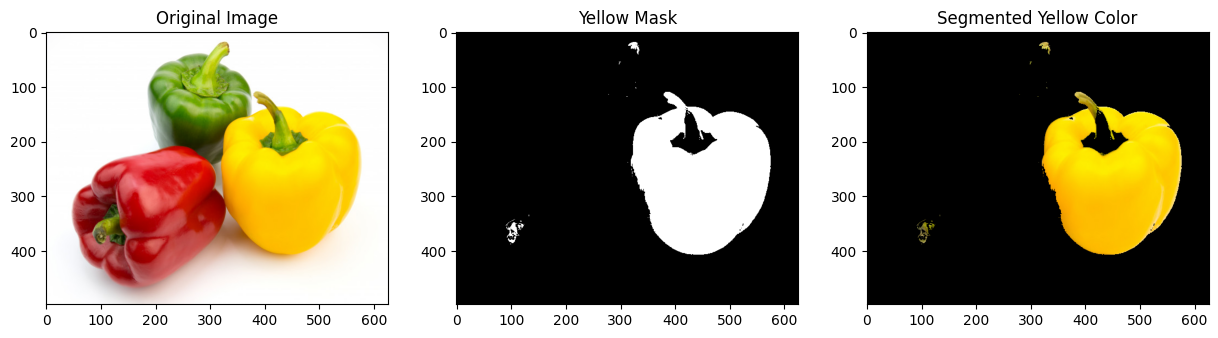

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image_path = '/content/drive/MyDrive/peppers.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB

# Konversi gambar ke HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definisi rentang warna kuning dalam ruang HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Masking warna kuning
mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

# Terapkan mask pada gambar asli
result_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_yellow)

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

# Mask warna kuning
plt.subplot(1, 3, 2)
plt.imshow(mask_yellow, cmap='gray')
plt.title('Yellow Mask')

# Hasil segmentasi (warna kuning)
plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.title('Segmented Yellow Color')

plt.show()


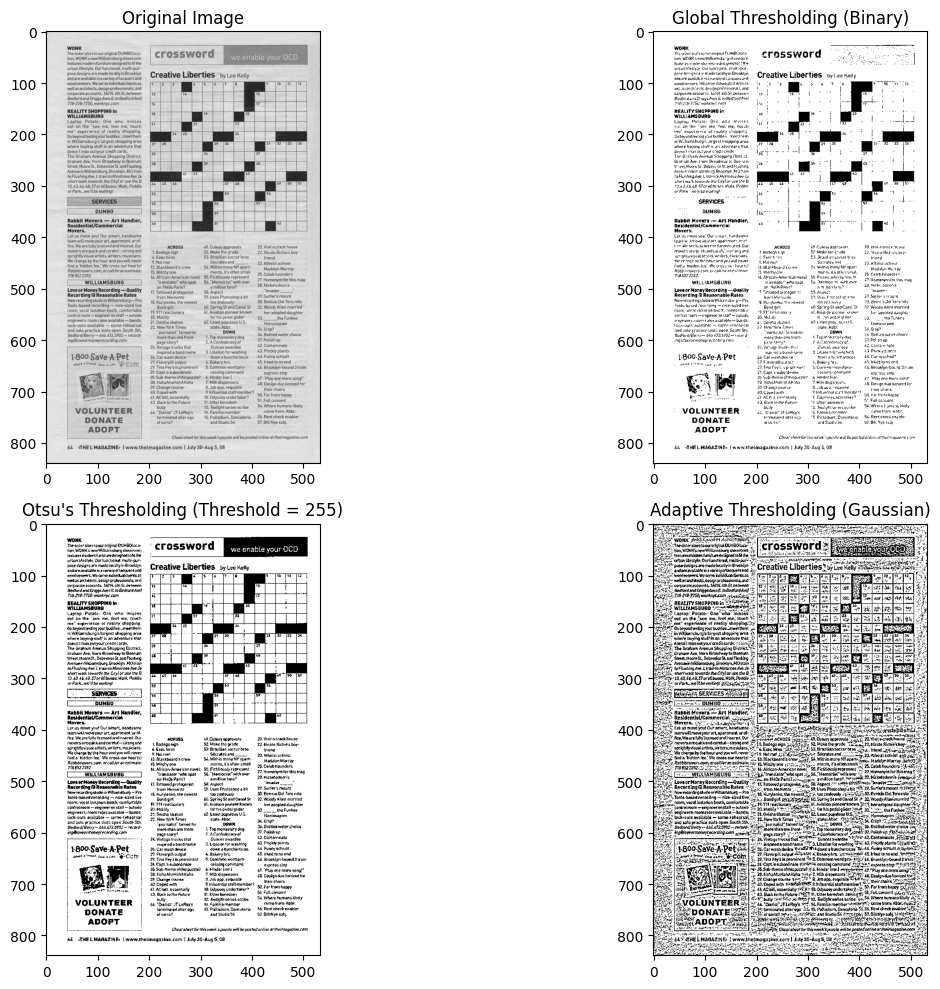

In [33]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar
image_path = '/content/drive/MyDrive/crossword.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Metode 1: Global thresholding (Binary Threshold)
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Metode 2: Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Metode 3: Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Plot hasil dari beberapa thresholding
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Global thresholding
plt.subplot(2, 2, 2)
plt.imshow(binary_thresh, cmap='gray')
plt.title('Global Thresholding (Binary)')

# Otsu's thresholding
plt.subplot(2, 2, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu's Thresholding (Threshold = {otsu_thresh.max()})")

# Adaptive thresholding
plt.subplot(2, 2, 4)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding (Gaussian)')

plt.tight_layout()
plt.show()
